In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# https://www.kaggle.com/snowdj/text-classification-using-bag-of-word-features/edit

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cross_validation import train_test_split

/home/jon/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))
chatbot_df = pd.read_csv("input/Sheet_1.csv",usecols=['response_id','class','response_text'],encoding='utf-8')
chatbot_df['class_label'] = Encode.fit_transform(chatbot_df['class'])
x_train,x_test,y_train,y_test = train_test_split(chatbot_df["response_text"],
                                                 chatbot_df['class_label'],
                                                 random_state=1)


Sheet_1.csv
Sheet_2.csv



In [9]:
result_cols = ["Classifier", "Accuracy"]
result_frame = pd.DataFrame(columns=result_cols)

In [10]:

# Any results you write to the current directory are saved as output.

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    MultinomialNB()]

In [11]:
for clf in classifiers:
    name = clf.__class__.__name__
    text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                  ('clf', clf),])
    text_clf.fit(x_train, y_train)
    
    predicted = text_clf.predict(x_test)
    acc = metrics.accuracy_score(y_test,predicted)
    print (name+' accuracy = '+str(acc*100)+'%')
    acc_field = pd.DataFrame([[name, acc*100]], columns=result_cols)
    result_frame = result_frame.append(acc_field)

KNeighborsClassifier accuracy = 70.0%
SVC accuracy = 75.0%
NuSVC accuracy = 90.0%
DecisionTreeClassifier accuracy = 65.0%
RandomForestClassifier accuracy = 80.0%
AdaBoostClassifier accuracy = 90.0%
MultinomialNB accuracy = 70.0%


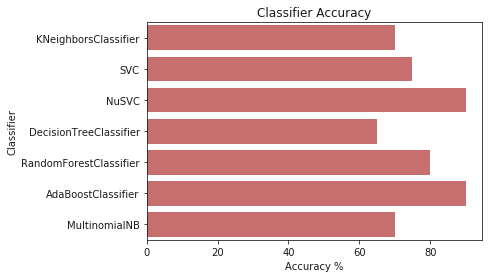

In [12]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=result_frame, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()